<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Bank Client Data)

#### Bank client data:
**age:** Age of the client<br>
**duration:** last contact duration, in seconds.<br> 

#### Other attributes:
**campaign:** number of contacts performed during this campaign and for this client<br>
**pdays:** number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)<br>
**previous:** number of contacts performed before this campaign and for this client<br>

#### Social and economic context attributes
**emp.var.rate:** employment variation rate - quarterly indicator<br>
**cons.price.idx:** consumer price index - monthly indicator<br>
**cons.conf.idx:** consumer confidence index - monthly indicator<br>
**euribor3m:** euribor 3 month rate - daily indicator<br>
**nr.employed:** number of employees - quarterly indicator<br>

**y** - (Output variable) has the client subscribed a term deposit?

Data citation: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

## Table of Content

1. **[Data Preprocessing](#dp)**
1. **[K Nearest Neighbors (KNN)](#knn)**
2. **[Naive Bayes](#nb)**

**Import the required libraries**

In [1]:
# type your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the csv file

In [53]:
# type your code here
df = pd.read_csv('bank.csv')

In [54]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32,205,2,999,0,1.1,93.994,-36.4,4.858,5191.0,no
1,32,691,10,999,0,1.4,93.918,-42.7,4.960,5228.1,yes
2,45,45,8,999,0,1.4,93.444,-36.1,4.963,5228.1,no
3,33,400,1,5,2,-1.1,94.601,-49.5,1.032,4963.6,yes
4,47,903,2,999,1,-1.8,93.075,-47.1,1.415,5099.1,yes


<a id="dp"> </a>
## 1. Data Preprocessing

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Remove the outliers (if any).</b>
                </font>
            </div>
        </td>
    </tr>
</table>

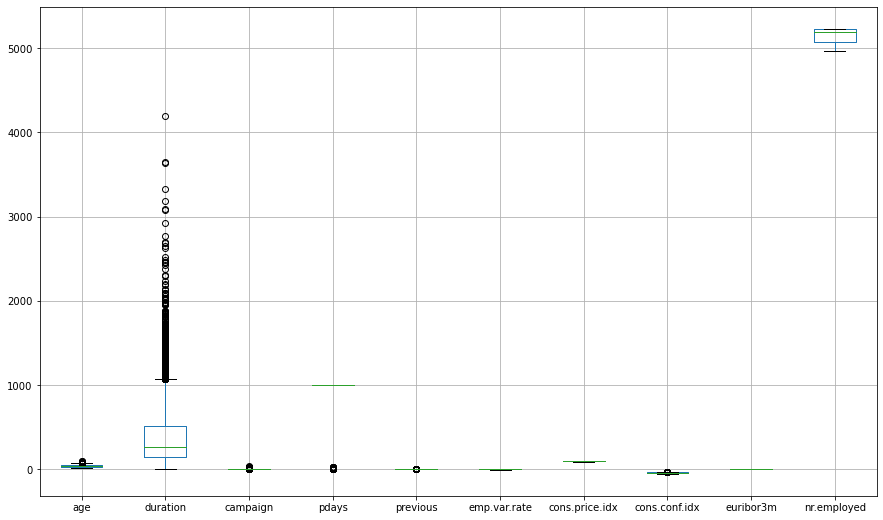

In [10]:
# type your code here
df.boxplot(figsize=(15,9))
plt.show()

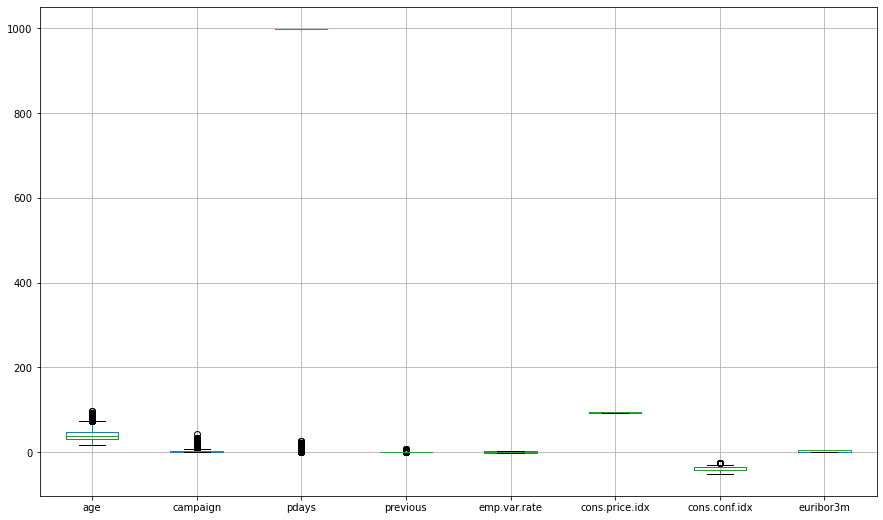

In [12]:
df.drop(columns=['duration','nr.employed']).boxplot(figsize=(15,9))
plt.show()

In [59]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3-q1

df = df[~((df < q1-1.5*IQR) | (df > q3+1.5*IQR))]

,<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Separate the dependent and the independent variables. Also, in the target variable, replace no with 0 and yes with 1.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [60]:
df['y'].replace({'no':0,'yes':1},inplace=True)

x = df.drop(columns='y')
y = df['y']

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Replace the value "unknown" from each column with NaN.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [62]:
x.replace('unknown',np.nan,inplace=True)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Look for the null values and treat the null values.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [67]:
# type your code here
((x.isnull().sum()/len(x))*100).sort_values(ascending=False)

previous          21.659751
pdays             10.663900
duration           5.217842
campaign           4.419087
cons.conf.idx      2.230290
age                1.784232
nr.employed        0.000000
euribor3m          0.000000
cons.price.idx     0.000000
emp.var.rate       0.000000
dtype: float64

In [76]:
x.fillna(x.median(),inplace=True)

In [77]:
x.isnull().sum()

age               0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Remove the unnecessary variables that will not contribute to the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [78]:
# type your code here
x.std()

age                10.620972
duration          239.932455
campaign            1.209585
pdays               0.000000
previous            0.000000
emp.var.rate        1.717852
cons.price.idx      0.631366
cons.conf.idx       4.928466
euribor3m           1.886179
nr.employed        86.347481
dtype: float64

In [79]:
x = x.drop(columns=['pdays','previous'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Plot the distribution of all the numeric variables and find the value of skewness for each variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

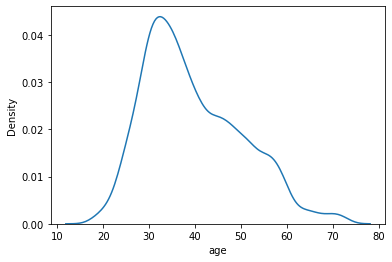

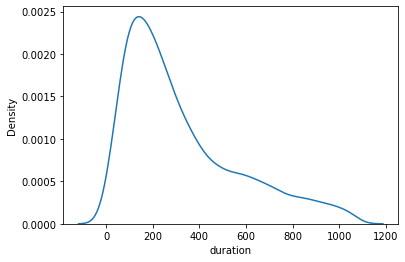

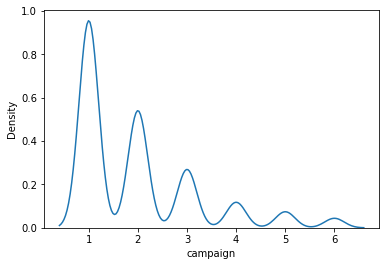

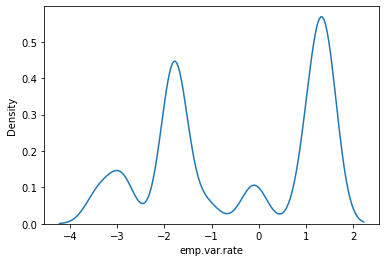

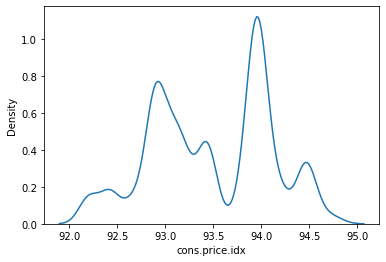

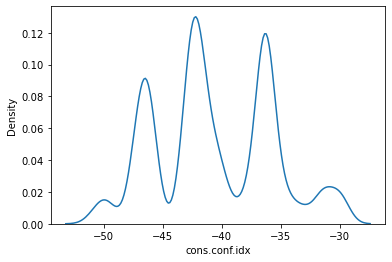

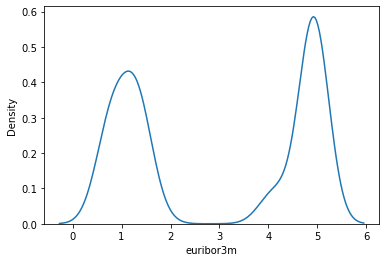

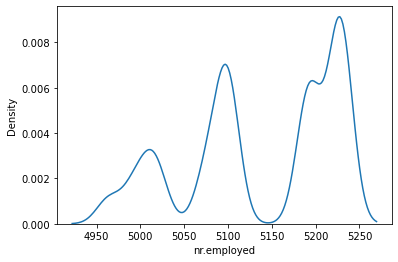

In [91]:
# type your code here
k=1
for i in x.columns:
    sns.kdeplot(x=df[i])
    plt.show()

In [92]:
x.skew()

age               0.639715
duration          1.148448
campaign          1.429873
emp.var.rate     -0.181234
cons.price.idx   -0.125216
cons.conf.idx     0.198482
euribor3m        -0.058332
nr.employed      -0.463581
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Plot the distribution of the target variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

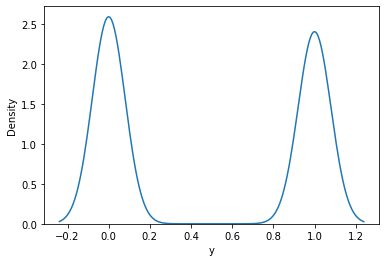

Skewness =  0.0747525639941804


In [96]:
# type your code here
sns.kdeplot(y)
plt.show()

print('Skewness = ',y.skew())

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Scale all the numeric variables using standard scalar.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [98]:
# type your code here
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()

x_ss = ss.fit_transform(x)
x_ss = pd.DataFrame(x, columns= x.columns)

<a id="knn"> </a>
## 2. K Nearest Neighbors (KNN)

## We shall use the bank marketing dataset that we cleaned above

Before applying classification techniques to predict whether the client subscribed the term deposit or not, let us split the dataset in train and test set.

In [99]:
# type your code here
from sklearn.model_selection import train_test_split

xtrain_full,xtest_full,ytrain,ytest = train_test_split(x_ss,y,test_size=0.3,random_state=1)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Create a function to draw a confusion matrix (heatmap) and a function to plot a roc-auc curve.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Define a function to plot the confusion matrix.

In [108]:
# type your code here
def con_mat(y_actual, y_predicted):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_actual,y_predicted)
    cm_df = pd.DataFrame(cm, index =['Actual 0','Actual 1'], columns = ['Predicted as 0','Predicted as 1'])
    sns.heatmap(cm_df,annot=True,fmt='d',cbar=False,cmap='Blues')
    plt.show()

#### Define a function to plot the ROC curve.

In [101]:
# type your code here
def roc_cur(y_actual, y_predicted):
    from sklearn.metrics import roc_curve
    
    fpr,tpr,thresholds = roc_curve(y_actual, y_predicted)
    
    plt.plot(fpr,fpr)
    plt.plot(fpr,tpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a knn model on a training dataset with euclidean distance and 3 neighbours to predict whether or not the client subscribed the term deposit. Calculate the accuracy of the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [103]:
# type your code here
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3,p=2)

knn.fit(xtrain_full,ytrain)
ypred_full = knn.predict(xtest_full)

In [106]:
from sklearn.metrics import accuracy_score

print('Accuracy Score=',accuracy_score(ytest,ypred_full))

Accuracy Score= 0.8364453665283541


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Plot a confusion matrix using the function created above and print a classification report. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

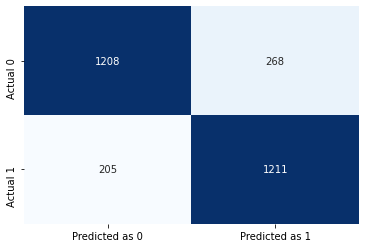

In [109]:
# type your code here
con_mat(ytest,ypred_full)

In [111]:
from sklearn.metrics import classification_report

print(classification_report(ytest,ypred_full))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1476
           1       0.82      0.86      0.84      1416

    accuracy                           0.84      2892
   macro avg       0.84      0.84      0.84      2892
weighted avg       0.84      0.84      0.84      2892



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Find the optimal value of 'k' in knn with 3 fold cross validation.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

    n_neighbors = np.arange(1, 25, 2)
    metric = ['hamming','euclidean','manhattan','Chebyshev']

In [114]:
# type your code here
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier(n_jobs=-1)

params = {'n_neighbors' : np.arange(1, 25, 2),'metric' : ['hamming','euclidean','manhattan','Chebyshev']}

gscv = GridSearchCV(knn,param_grid=params,cv=3,scoring='accuracy',n_jobs=-1)
gscv.fit(xtrain_full,ytrain)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'metric': ['hamming', 'euclidean', 'manhattan',
                                    'Chebyshev'],
                         'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23])},
             scoring='accuracy')

In [115]:
gscv.best_params_

{'metric': 'manhattan', 'n_neighbors': 11}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13.  Build a KNN model with the best parameters and find the accuracy. Also generate a classification report.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [117]:
# type your code here
knn = KNeighborsClassifier(**gscv.best_params_)

knn.fit(xtrain_full,ytrain)

ypred = knn.predict(xtest_full)

print('The Accuracy = ',accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

The Accuracy =  0.8433609958506224
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1476
           1       0.82      0.88      0.85      1416

    accuracy                           0.84      2892
   macro avg       0.84      0.84      0.84      2892
weighted avg       0.85      0.84      0.84      2892



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the area under the receiver operating characteristic curve and the confusion matrix for the tuned KNN model built in question 13.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

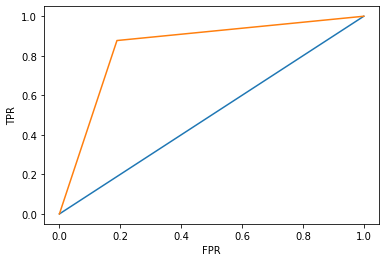

The AUC score= 0.8440471269119472


In [121]:
# type your code here
from sklearn.metrics import roc_auc_score
roc_cur(ytest,ypred)
print('The AUC score=',roc_auc_score(ytest,ypred))

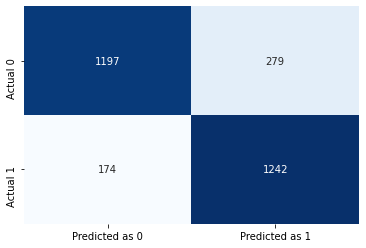

In [122]:
con_mat(ytest,ypred)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Calculate the percentage of misclassified and correctly classified observations.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [128]:
# type your code here
from sklearn.metrics import confusion_matrix

c = confusion_matrix(ytest,ypred)
tn = c[0,0]
tp = c[1,1]
fp = c[1,0]
fn = c[0,1]

cor_per = ((tn+tp)/(tn+tp+fn+fp))*100
incor_per = ((fn+fp)/(tn+tp+fn+fp))*100

In [129]:
print('Percentage of correct classifications',cor_per)
print('Percentage of incorrect classifications',incor_per)

Percentage of correct classifications 84.33609958506224
Percentage of incorrect classifications 15.663900414937759


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Compute the accuracy for each value of k and append the value in a list 'accuracy'. Build knn models for euclidean distance metric. Consider only the odd numbers between the range 1 and 25 for the 'k'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [139]:
# type your code here
l = np.arange(1,25,2)
results=[]
for i in l:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain_full,ytrain)
    ypred = knn.predict(xtest_full)
    results.append(accuracy_score(ytest,ypred))

In [140]:
results

[0.803941908713693,
 0.8364453665283541,
 0.8402489626556017,
 0.8475103734439834,
 0.8454356846473029,
 0.8457814661134163,
 0.843015214384509,
 0.8409405255878285,
 0.843015214384509,
 0.8416320885200553,
 0.8450899031811895,
 0.8447441217150761]

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Draw a line plot to see the accuracy (list created in the above question) for each value of K using euclidean distance as a metric of KNN model and find the optimal value of 'k'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

    n_neighbors = np.arange(1, 25, 2)

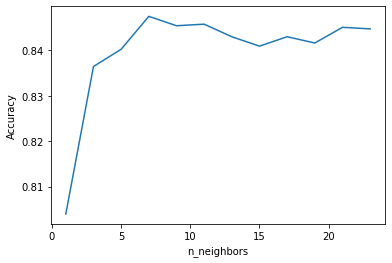

In [143]:
# type your code here
sns.lineplot(x=np.arange(1,25,2),y = results)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

<a id="nb"> </a>
## 3. Naive Bayes

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Build a Gaussian naive bayes model and generate a classification report. Also tell how well is the model performing.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [145]:
# type your code here
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(xtrain_full,ytrain)
ypred= gnb.predict(xtest_full)

In [146]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74      1476
           1       0.72      0.82      0.77      1416

    accuracy                           0.76      2892
   macro avg       0.76      0.76      0.76      2892
weighted avg       0.76      0.76      0.76      2892



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Find the area under the receiver operating characteristic curve and the confusion matrix for the Naive Bayes model built in question 18.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [147]:
# type your code here
roc_auc_score(ytest,ypred)

0.7582391713747646

In [148]:
confusion_matrix(ytest,ypred)

array([[1025,  451],
       [ 252, 1164]], dtype=int64)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build a Gaussian Naive Bayes model and perform 10 fold cross validation and find the average accuracy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [149]:
# type your code here
from sklearn.model_selection import cross_val_score

cv = cross_val_score(gnb, x_ss,y,cv=10,scoring='accuracy')


In [151]:
print('The average accuracy =',np.mean(cv))

The average accuracy = 0.7575726141078838
